In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier#(classifier because we are going to deal with classification problem i.e. categorical problem)
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = 'heart (4).csv'
df = pd.read_csv(data)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

In [4]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
col = df.columns
col

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

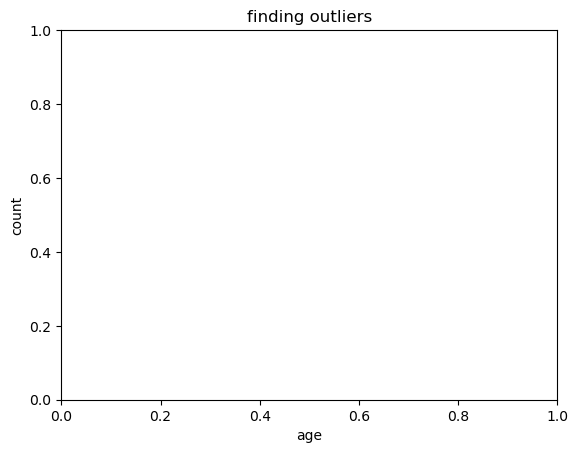

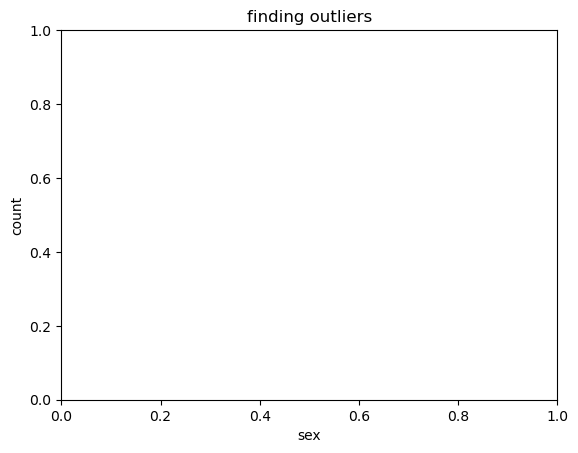

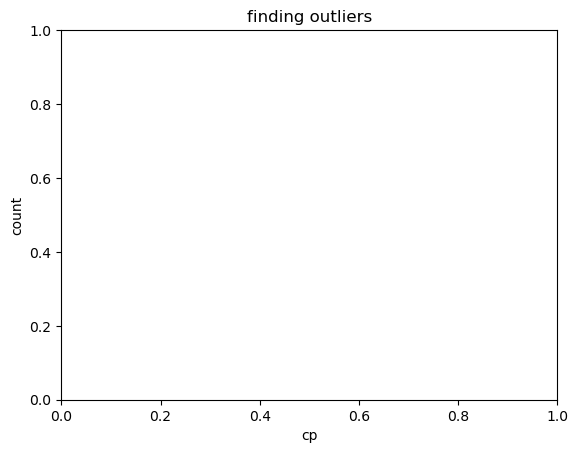

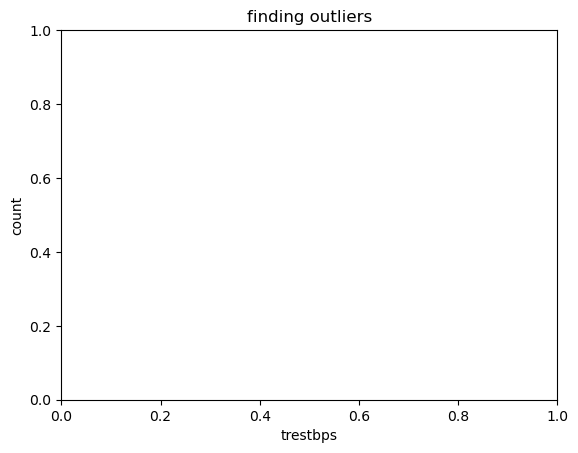

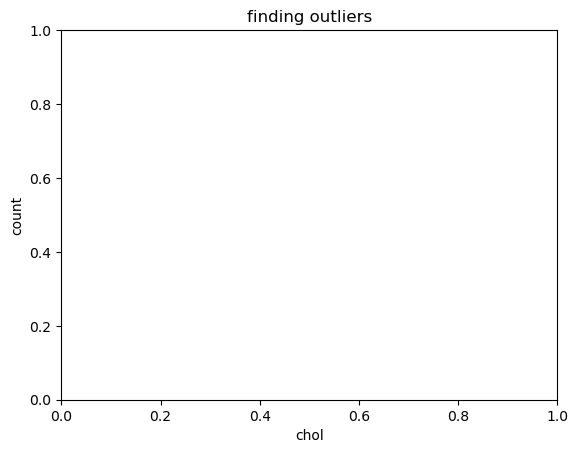

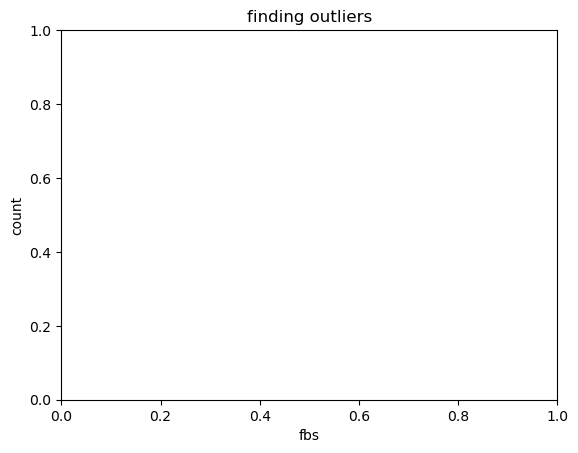

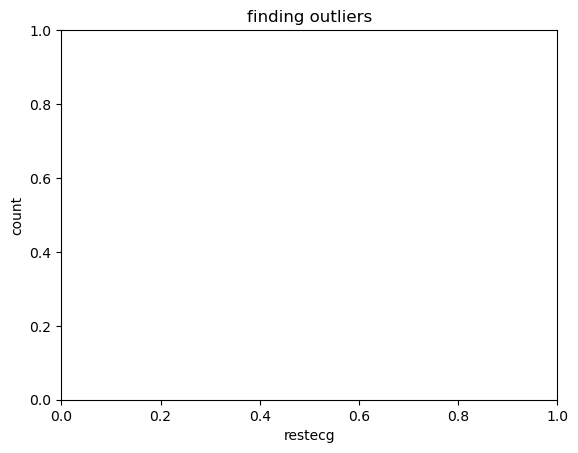

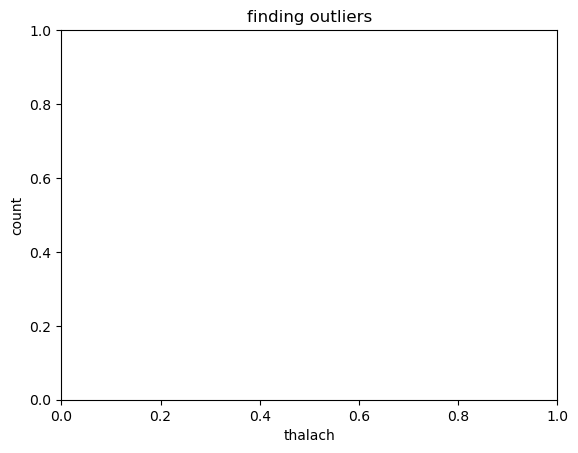

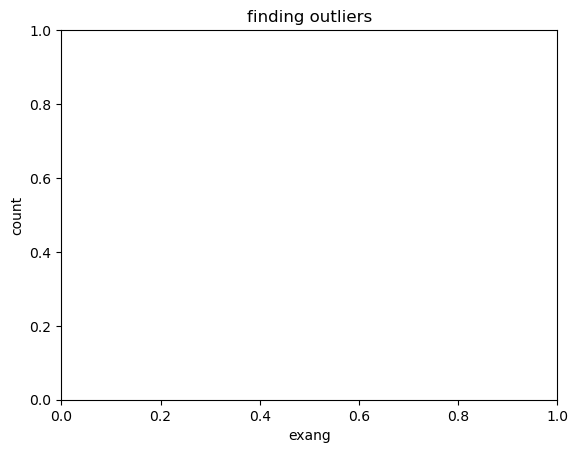

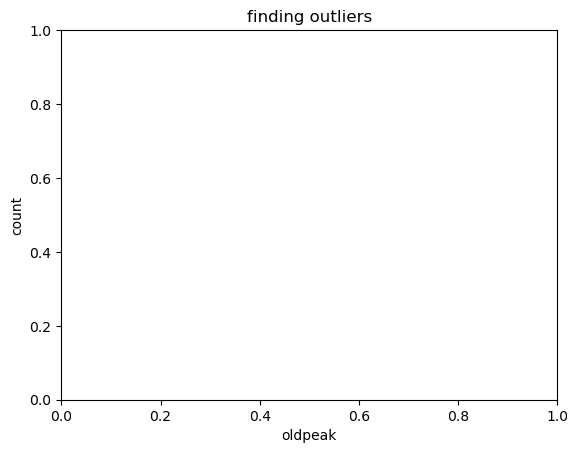

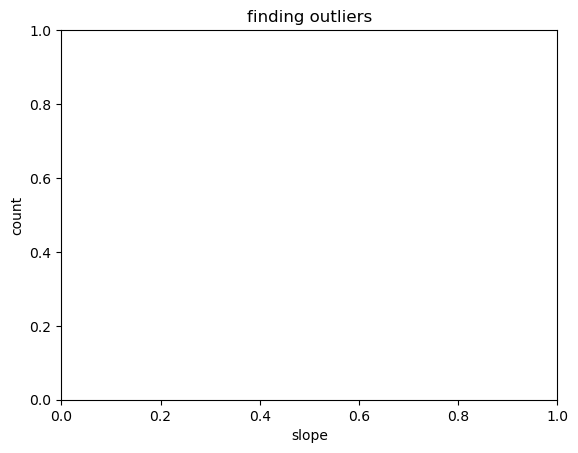

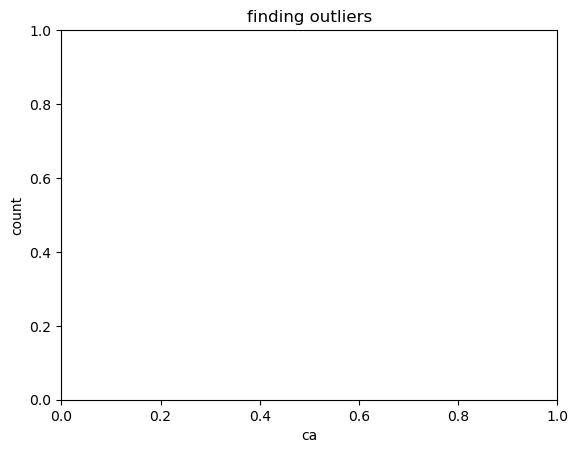

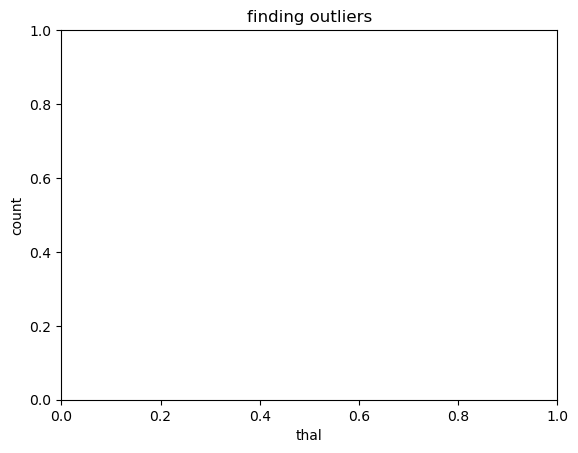

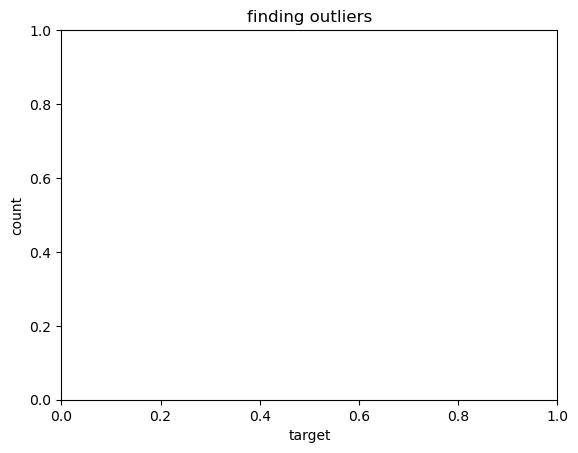

In [7]:
for col in df.columns:
    plt.box(col)
    plt.xlabel(col)
    plt.ylabel('count')
    plt.title('finding outliers')
    plt.show()


In [8]:
df['target'].unique()

array([1, 0], dtype=int64)

In [9]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [10]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [11]:
df[df['chol']>300].shape
#(how many patients are there who have cholestrol greater than 300)

(43, 14)

In [12]:
df[df['chol']>300].count()

age         43
sex         43
cp          43
trestbps    43
chol        43
fbs         43
restecg     43
thalach     43
exang       43
oldpeak     43
slope       43
ca          43
thal        43
target      43
dtype: int64

In [13]:
chol1 = df[df['chol']>300]
chol1['chol']
#displaying a particular function


4      354
16     340
25     302
28     417
36     304
39     360
40     308
44     321
45     325
51     302
59     303
61     309
81     308
82     318
85     564
96     394
98     315
110    325
112    313
120    303
134    306
141    303
161    342
177    335
180    353
182    330
190    305
195    326
213    307
215    341
217    330
220    407
229    309
234    322
238    304
246    409
255    309
266    327
278    319
280    315
285    311
288    335
291    318
Name: chol, dtype: int64

In [14]:
f = df[df['thal']==2]
f

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,61,1,0,138,166,0,0,125,1,3.6,1,1,2,0
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [16]:
# left skewed data -- mean, median mode
# right skewed data -- mode, median, mean

In [17]:
# binning - halps us to convert out numerical value to categorical data
#20-30, 30-40, 40,50
# label encoder -- convert our categorical value to numerical value
#female, male
#0,1

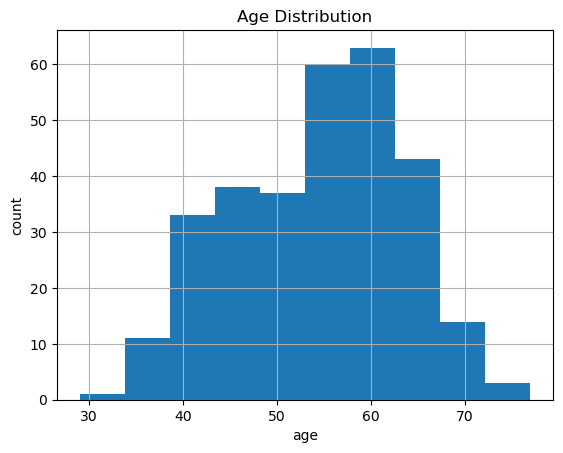

In [18]:
df['age'].hist(grid = True, bins = 10)
plt.title('Age Distribution')
plt.xlabel("age")
plt.ylabel("count")
plt.show()

In the above data we analyse that the distribution of Age column, we can say that thereare 60+ people who acheving age between 57 to 63

C:\Users\aditia sharma\AppData\Local\Temp\ipykernel_736\1545786310.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['sex']==1]['age'], label = 'Male')
C:\Users\aditia sharma\AppData\Local\Temp\ipykernel_736\1545786310.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['sex']==0][

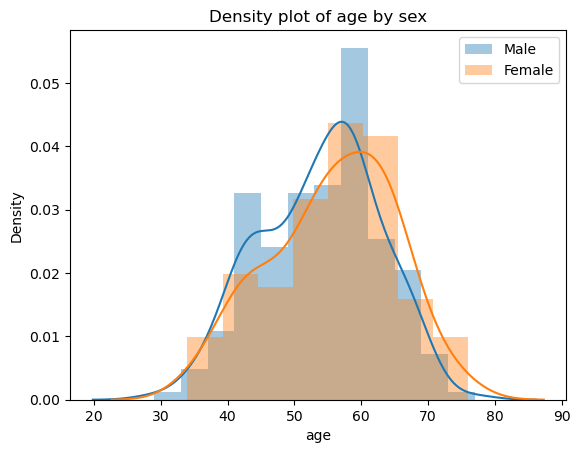

In [19]:
sns.distplot(df[df['sex']==1]['age'], label = 'Male')
sns.distplot(df[df['sex']==0]['age'], label = 'Female')
plt.legend()
plt.title('Density plot of age by sex')
plt.show()


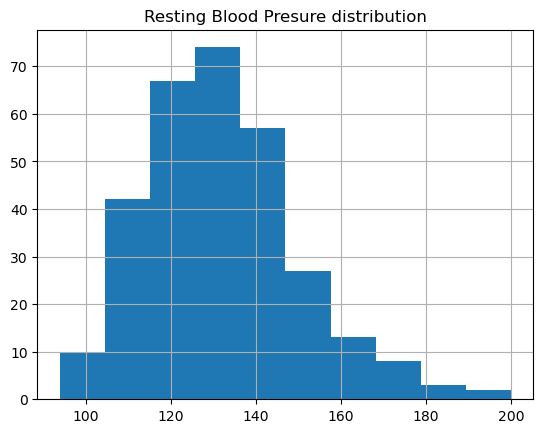

In [20]:
df['trestbps'].hist()
plt.title('Resting Blood Presure distribution')
plt.show()

<Axes: xlabel='oldpeak'>

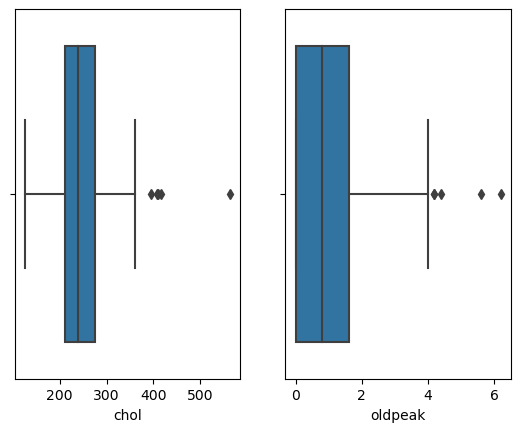

In [21]:
fig, axes = plt.subplots(nrows = 1, ncols=2)
sns.boxplot(x='chol', data = df, ax = axes[0])
sns.boxplot(x='oldpeak', data = df, ax = axes[1])

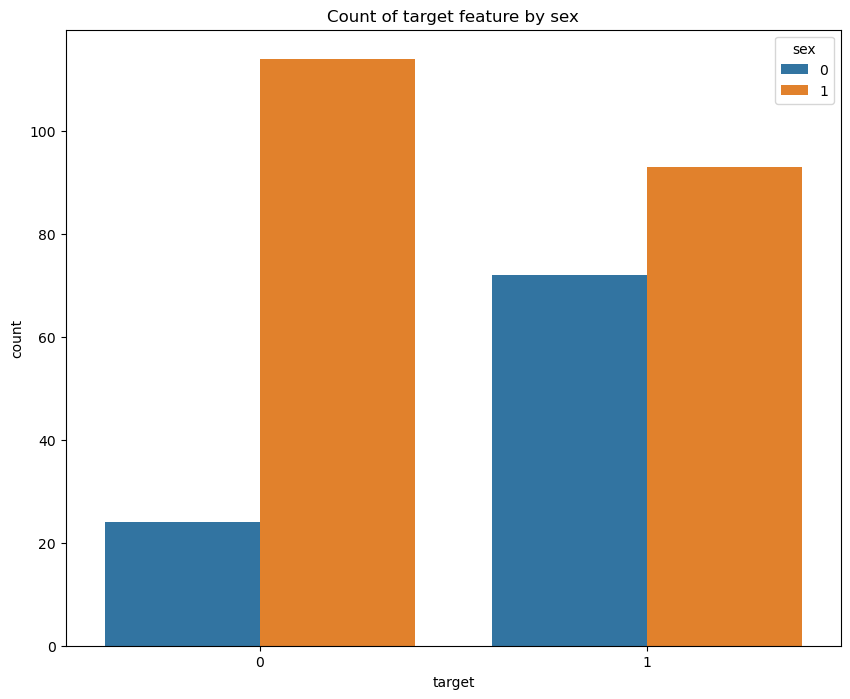

In [22]:
plt.rcParams['figure.figsize'] = (10,8)
sns.countplot(x='target', hue ='sex', data =df);
plt.title('Count of target feature by sex')
plt.show()

The amount of healthy male people is greater than the amount of unhealthy. For women, the number of unhealthy women is higher.


In [23]:
df.drop(columns=['target'])

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [24]:
X = df.drop(columns=['target'])# independent data should be always be in a dataframe format(2d) data
y = df['target']# dependent data or target
print(X.shape)
print(y.shape)

(303, 13)
(303,)


In [25]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=0, test_size=0.3)
print(x_train.shape)
print(x_test.shape)


(212, 13)
(91, 13)


In [26]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
137,62,1,1,128,208,1,0,140,0,0.0,2,0,2
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3
44,39,1,2,140,321,0,0,182,0,0.0,2,0,2
139,64,1,0,128,263,0,1,105,1,0.2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3
192,54,1,0,120,188,0,1,113,0,1.4,1,1,3
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2


In [27]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
225,70,1,0,145,174,0,1,125,1,2.6,0,0,3
152,64,1,3,170,227,0,0,155,0,0.6,1,0,3
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3
52,62,1,2,130,231,0,1,146,0,1.8,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,67,1,0,100,299,0,0,125,1,0.9,1,2,2
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3
76,51,1,2,125,245,1,0,166,0,2.4,1,0,2
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2


In [28]:
clf = tree.DecisionTreeClassifier(max_depth=3)# we are creating a decision tree model untrained model as of now
clf.fit(x_train, y_train)

#testing the model
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
forest_model = RandomForestRegressor(n_estimators= 1000, random_state=42)
forest_model.fit(x_train, y_train)

y_t_pred = forest_model.predict(x_test)


In [30]:
errors = abs(y_t_pred - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.26 degrees.


In [31]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: -inf %.


In [32]:
y_train_pred

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1], dtype=int64)

In [33]:
y_test_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0], dtype=int64)

In [34]:
print(f'Train score {accuracy_score(y_train_pred, y_train)}')
print(f'Train score {accuracy_score(y_test_pred, y_test)}')

Train score 0.8679245283018868
Train score 0.8131868131868132


In [35]:
print(f'Train score {accuracy_score(y_t_pred, y_test)}')

ValueError: Classification metrics can't handle a mix of continuous and binary targets

In [36]:
# helper function
def plot_confusionmatrix(y_train_pred, y_train, dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred, y_train)
    sns.heatmap(cf, annot=True, cmap = 'Blues', fmt='g') #
    plt.show()

Train Confusion matrix


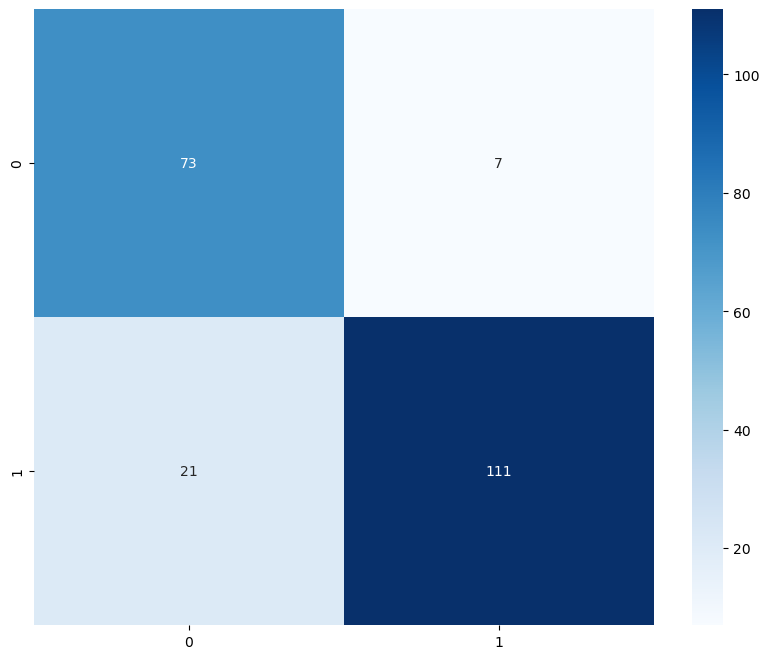

Train Confusion matrix


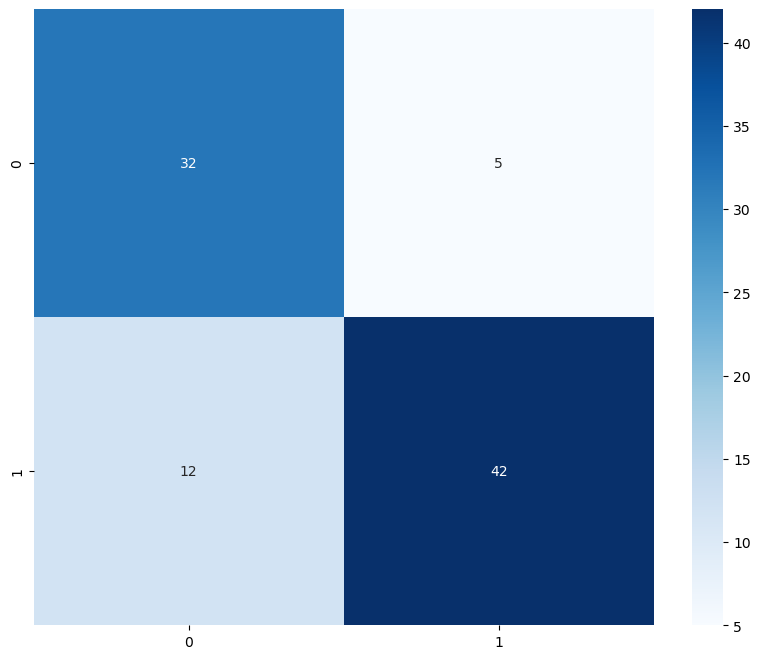

In [37]:
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Train')

In [38]:
#export_grapghviz

In [39]:
c_parameter_name = 'max_depth'
c_parameter_values = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15] # there are 1 - 15 depths
df = pd.DataFrame(columns = [c_parameter_name, 'accuracy'])# creatung empty database

for input_parameter in c_parameter_values: #for the first loop, input parameter will be 1
    model = tree.DecisionTreeClassifier(max_depth=input_parameter)# in the for loop, it will create a dt model with 1 as the max depth value. 
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc_score = accuracy_score(y_test,y_pred)*100
    df = df.append({c_parameter_name : input_parameter, 'accuracy' : acc_score},ignore_index = True)
print(df)
print("")

    max_depth   accuracy
0         1.0  76.923077
1         2.0  73.626374
2         3.0  81.318681
3         4.0  76.923077
4         5.0  74.725275
5         6.0  75.824176
6         7.0  71.428571
7         8.0  75.824176
8         9.0  74.725275
9        10.0  72.527473
10       11.0  73.626374
11       12.0  71.428571
12       13.0  74.725275
13       14.0  72.527473
14       15.0  71.428571



C:\Users\aditia sharma\AppData\Local\Temp\ipykernel_736\2808660625.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({c_parameter_name : input_parameter, 'accuracy' : acc_score},ignore_index = True)
C:\Users\aditia sharma\AppData\Local\Temp\ipykernel_736\2808660625.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({c_parameter_name : input_parameter, 'accuracy' : acc_score},ignore_index = True)
C:\Users\aditia sharma\AppData\Local\Temp\ipykernel_736\2808660625.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({c_parameter_name : input_parameter, 'accuracy' : acc_score},ignore_index = True)
C:\Users\aditia sharma\AppData\Local\Temp\ipykernel_736\2808660625.py:10: FutureWa

In [40]:
model = tree.DecisionTreeClassifier(max_depth = 3)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
acc_score = accuracy_score(y_test, y_pred)*100

In [41]:
acc_score

81.31868131868131

In [42]:
from sklearn.metrics import classification_report

In [43]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.73      0.86      0.79        37
           1       0.89      0.78      0.83        54

    accuracy                           0.81        91
   macro avg       0.81      0.82      0.81        91
weighted avg       0.83      0.81      0.81        91

